<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/newtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as  pd 
import numpy as np
import matplotlib as  plt 

# Create URL
url = '//content/drive/MyDrive/test folder/Social_Network_Ads.csv'

# Read the data and see inside the data[5]:
dataframe = pd.read_csv(url)
dataframe.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Check for NaN Data
dataframe.isnull().values.any()

False

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Check the "Smoking_status" Data
dataframe['Gender'].describe()

count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object

In [ ]:
# Change the value of gender, so that we can handle it
scale_mapper = {"Female":0,
                "Male":1,
                }

dataframe["Gender"]=dataframe["Gender"].replace(scale_mapper)
dataframe.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
# Check info of data again
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [ ]:
# After checking, we see that the column 'id' is unnecessary, so we need to remove it
dataframe.drop("User ID",axis = 1, inplace = True)

In [ ]:
# Check for the "id" column does exist ?
dataframe

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
# Save features and prediction
Features = ['Gender','Age','EstimatedSalary']
PredictClass = ['Purchased']

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

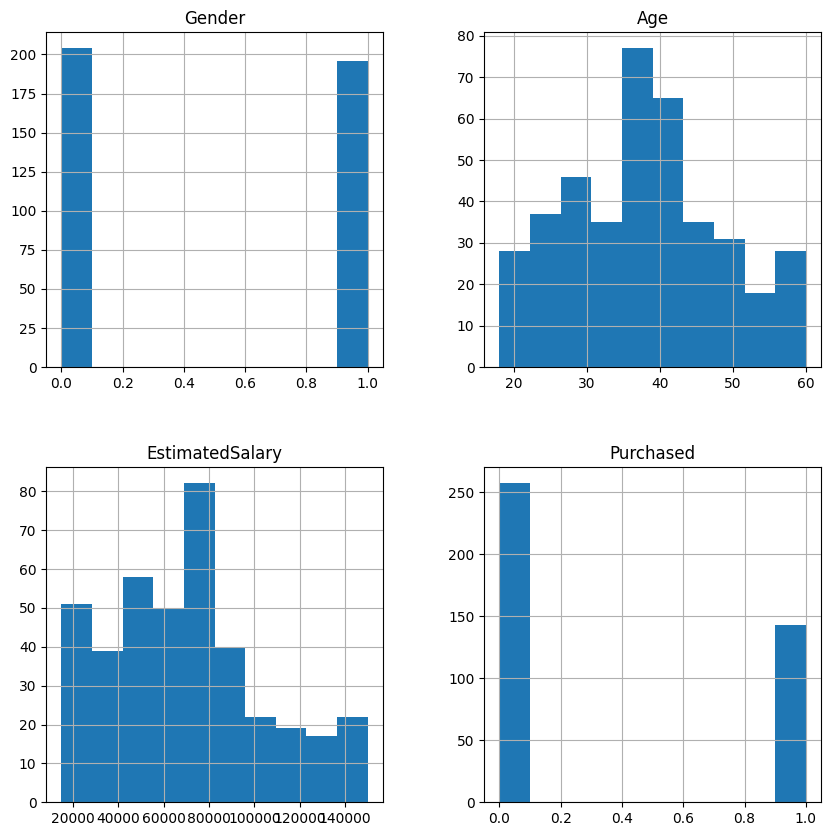

In [ ]:
# Check for the imbalance appears in the data, or not
dataframe.hist(bins=10, figsize=(10,10))

In [ ]:
# Split, Train and Test
from sklearn.model_selection import train_test_split
X = dataframe[Features].values
Y = dataframe[PredictClass].values
features_train, features_test, target_train, target_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Standardize the data
from sklearn.preprocessing import StandardScaler
STD = StandardScaler()
TrainStd = STD.fit_transform(features_train)
TestStd =  STD.fit_transform(features_test)

from sklearn.ensemble import RandomForestClassifier
# using RandomForest for Classification
RF = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
model_1= RF.fit(TrainStd, target_train)
# Operation the output of RandomForest:
Target = model_1.predict(TestStd)
Target

<ipython-input-12-7f4c36b71579>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1= RF.fit(TrainStd, target_train)


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
# Test for accuracy
model_1.score(TestStd, target_test)

0.8666666666666667

In [ ]:
print(X.shape)
print(Y.shape)

if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(400, 3)
(400, 1)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Create standard scaler object
std_scaler = StandardScaler()

# Fit standard scaler to training set and transform features
train_std = std_scaler.fit_transform(features_train)
test_std = std_scaler.transform(features_test)

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline
pipeline = make_pipeline(std_scaler, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Reshape the features and target
X = X.reshape((400, 3))
Y = Y.reshape((400, 1))

# Perform k-fold cross-validation
cv_results = cross_val_score(pipeline, X, Y, cv=kf, scoring="accuracy", n_jobs=-1)

# Print the cross-validation results
print("Cross-validation Accuracy: {:.2f}% (±{:.2f}%)".format(cv_results.mean() * 100, cv_results.std() * 100))

Cross-validation Accuracy: 85.25% (±4.25%)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
# Split the data into training and test sets
X = dataframe[Features].values
Y = dataframe[PredictClass].values
features_train, features_test, target_train, target_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Standardize the data
std_scaler = StandardScaler()
train_std = std_scaler.fit_transform(features_train)
test_std = std_scaler.transform(features_test)

# Create and train the Naive Bayes classifier
NB = BernoulliNB()
model = NB.fit(train_std, target_train)

# Make predictions on the test set
target_pred = model.predict(test_std)

# Calculate and print the accuracy
accuracy = model.score(test_std, target_test)
print("Model_3 (Naive Bayes) Accuracy: {:.2f}%".format(accuracy * 100))

Model_3 (Naive Bayes) Accuracy: 69.17%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
